In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [5]:
#Viral dynamics parameter
hour = 24

CL = 2.3/hour
lambdaT = 2e9/hour
deltaT = 0.02/hour
deltaT1 = 0.02/hour
deltaT2 = 1/hour
deltaPIC = 0.35/hour
k = 0.35/hour
beta = 8e-12/hour
NT = 670/hour  #NT = 0.67*NThat
Tu = lambdaT/deltaT
    
#Estimated PK parameter
ka = 45.4382
k10 =  0.2355
k12 =  0.175
k21 =  0.0259
Vc =  162.69

k13 = 44.2394
k30 = 0.00975

In [6]:
#Compartment model
def ode(t, z):
    Z0 = z[0]; Z1 = z[1]; Z2 = z[2]; Z3 = z[3]
    dZ0 = -ka*Z0
    dZ1 = (ka/Vc)*Z0 - k10*Z1 - k12*Z1 + k21*Z2
    dZ2 = k12*Z1 - k21*Z2
    dZ3 = k13*Z1 - k30*Z3
    d = [dZ0,dZ1,dZ2,dZ3]
    return d

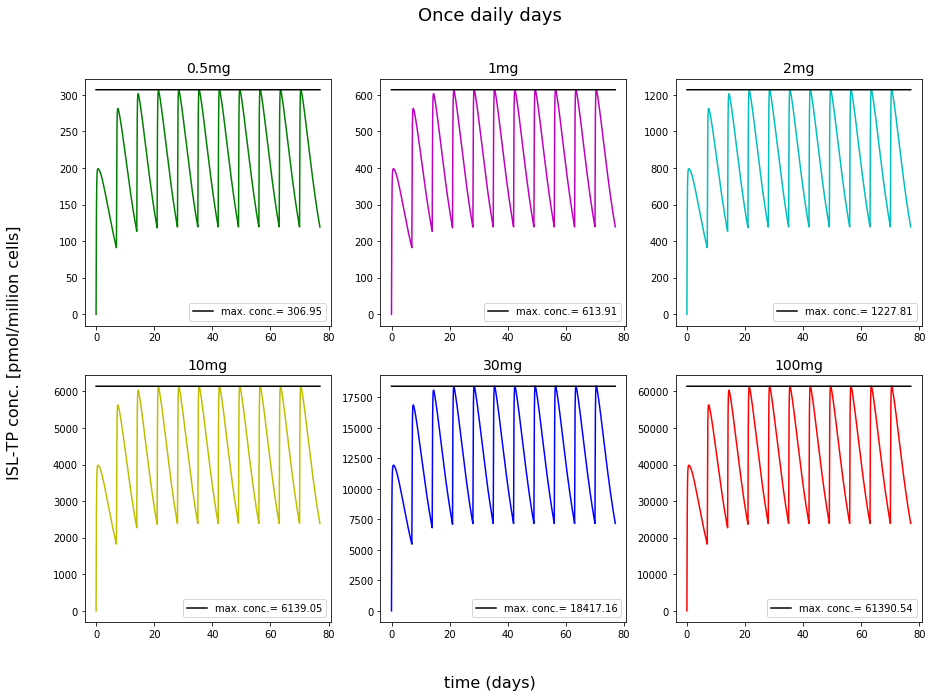

In [8]:
warnings.filterwarnings('ignore')

t0 = 0; tfinal = 2000 #hours
fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')

doses = [0.5,1,2,10,30,100]
c = ['g-', 'm-','c-','y-', 'b-','r-']
axs = axs.ravel()

reg = 168 #drug administration each reg (hrs), e.g. 168 for every week
tau_k = [0]
for i in range(int(tfinal/reg)): tau_k.append(reg*(i+1))

for j in range(len(doses)):
    z0 = [doses[j]*3410, 0, 0, 0]
    tList, DList = [], []  
    for tau in range(len(tau_k)-1): #list with administration events
        if tau == 0: z = z0
        t1 = tau_k[tau]; t2 = tau_k[tau+1]
        t = np.linspace(t1, t2, 24000)
        res = solve_ivp(ode, (t1,t2), z, t_eval=t)
        Z1 = res.y[1][-1]; Z2 = res.y[2][-1]; Z3 = res.y[3][-1]; 
        t = res.t
        Z0 = res.y[0][-1] + doses[j]*3410  #drug administration
        z = [Z0,Z1,Z2,Z3]
        DList += list(np.multiply(res.y[3],0.18)); 
        tList += list(t/24)
    cmax = max(DList)
    axs[j].set_title(str(doses[j])+'mg',fontsize=14)
    axs[j].plot(tList,DList,c[j])
    axs[j].plot(tList,[cmax]*len(tList),'k-', label='max. conc.= '+str(round(cmax,2)))
    axs[j].legend(loc='best')

fig.text(0.5, 0.04, 'time (days)', ha='center', va='center',fontsize=16);
fig.text(0.06, 0.5, 'ISL-TP conc. [pmol/million cells]', ha='center', va='center', rotation='vertical',fontsize=16);
fig.suptitle('Once daily days',fontsize=18);